In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Found 187 images belonging to 3 classes.
Found 45 images belonging to 3 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                       

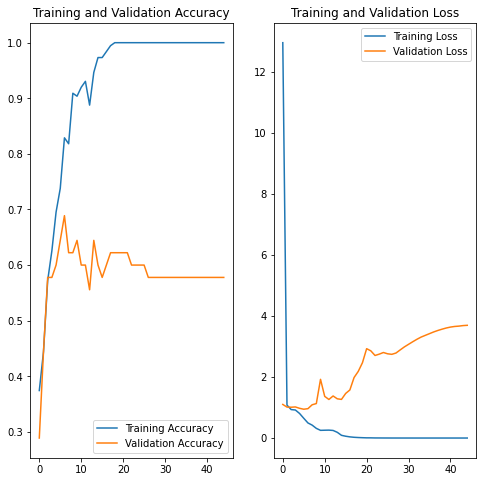

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from keras.applications.resnet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

batch_size = 40
IMG_SIZE = (180,180)
img_height=180
img_width=180

# Create the data generation pipeline for training and validation
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2) # set validation split

train_ds = train_datagen.flow_from_directory(PATH,
                                                target_size=IMG_SIZE,
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                subset = 'training')
val_ds = train_datagen.flow_from_directory(PATH,
                                                target_size=IMG_SIZE,
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                subset = 'validation')


num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

base_learning_rate = 0.007 #decrease for different results; use excel sheet to note down results from each change to learning rate and epochs
opt = keras.optimizers.Adam(learning_rate=base_learning_rate)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


epochs=45
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:

# Please replace the brackets below with the drive location of your folder which included subfolders for images
# Sample path: /content/drive/My Drive/ImageClassification
PATH = '/content/drive/My Drive/NebulasWithoutDarkReflection'